In [ ]:
# STEP 1: Import Required Libraries
!pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
# STEP 2: Load the Dataset
df = pd.read_csv('netflix data.csv')
print("Initial Shape:", df.shape)
df.head()


Initial Shape: (8790, 10)


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
# Load dataset
data = pd.read_csv("netflix data.csv")


In [6]:
# Data cleaning
data = data.drop_duplicates()
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')


In [7]:
# Netflix color theme (multiple pastel red shades)
netflix_reds = ["#FF6F61", "#FF7F7F", "#FF8C8C", "#FF9999", "#FFA3A3", "#FFB3B3", "#FFC2C2", "#FFD6D6"]

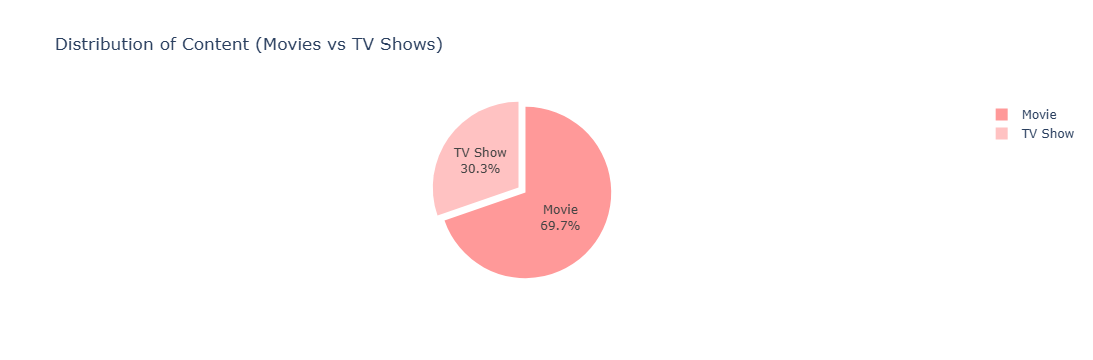

In [8]:
import plotly.express as px

# Example: Netflix content type distribution (replace with your dataframe)
fig1 = px.pie(
    data,
    names='type',
    title="Distribution of Content (Movies vs TV Shows)",
    color_discrete_sequence=[netflix_reds[3], netflix_reds[6]]
)

# Show only labels and percentages inside the chart
fig1.update_traces(
    textinfo='percent+label',
    pull=[0.05, 0.05],
    hoverinfo="none",       #  Disable hover
    hovertemplate=None      #  Ensure no tooltip shows up
)

fig1.show()

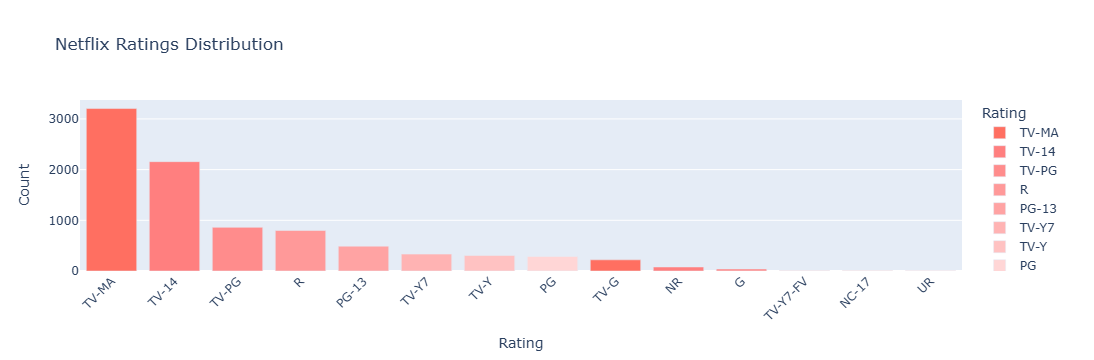

In [9]:
import plotly.express as px

# Ratings distribution
ratings = data['rating'].value_counts().reset_index()
ratings.columns = ['Rating', 'Count']

fig2 = px.bar(
    ratings,
    x='Rating',
    y='Count',
    title="Netflix Ratings Distribution",
    color='Rating',
    color_discrete_sequence=netflix_reds
)

# Rotate x-axis labels and disable hover
fig2.update_layout(
    xaxis_tickangle=-45
)
fig2.update_traces(
    hoverinfo="none",   #  Disable hover info
    hovertemplate=None  #  Ensure no tooltips appear
)

fig2.show()

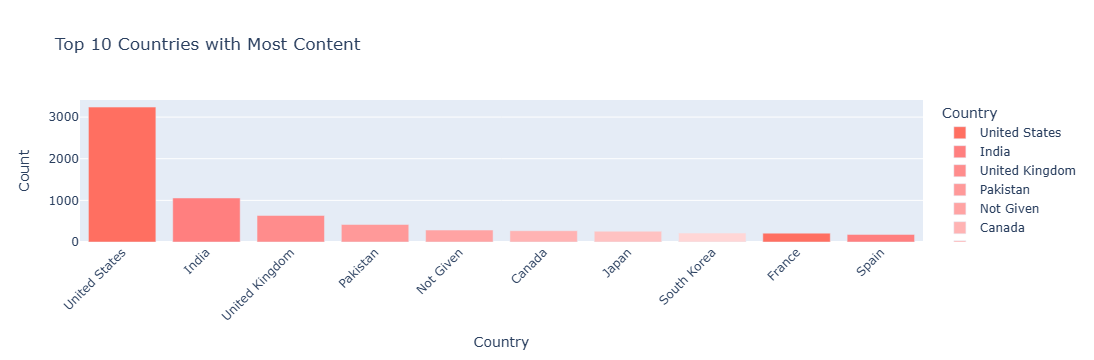

In [10]:
# Top 10 countries distribution
countries = data['country'].value_counts().reset_index().head(10)
countries.columns = ['Country', 'Count']

fig3 = px.bar(
    countries,
    x='Country',
    y='Count',
    title="Top 10 Countries with Most Content",
    color='Country',
    color_discrete_sequence=netflix_reds
)

# Rotate x-axis labels and disable hover
fig3.update_layout(
    xaxis_tickangle=-45
)
fig3.update_traces(
    hoverinfo="none",   #  Disable hover info
    hovertemplate=None  #  Ensure no tooltip appears
)

fig3.show()

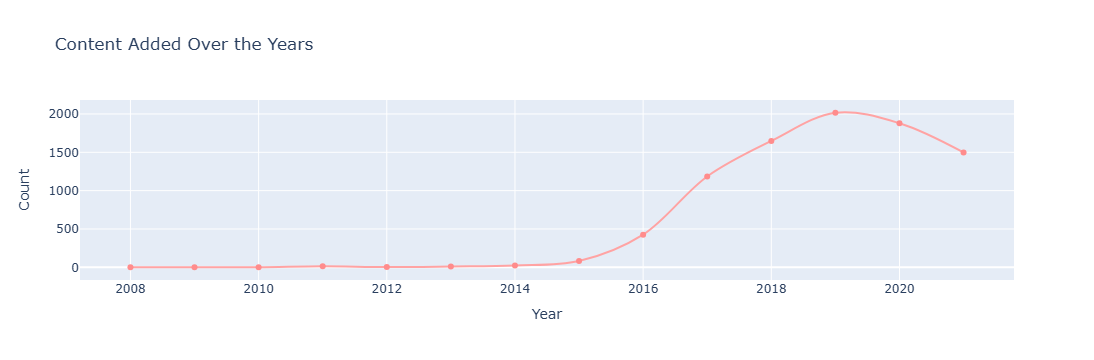

In [11]:
import plotly.express as px

if 'date_added' in data.columns:
    # Drop missing dates first
    data = data.dropna(subset=['date_added'])

    # Extract year
    data['year_added'] = data['date_added'].dt.year

    # Count per year
    yearly = data['year_added'].value_counts().sort_index().reset_index()
    yearly.columns = ['Year', 'Count']

    # Ensure Year is integer
    yearly = yearly.dropna().astype({'Year': 'int'})

    # Plot
    fig4 = px.line(
        yearly,
        x='Year',
        y='Count',
        title="Content Added Over the Years",
        markers=True,
        line_shape='spline'
    )
# Keep same colors as original
    fig4.update_traces(
        line=dict(color=netflix_reds[4]),
        marker=dict(color=netflix_reds[2]),
        hoverinfo="none",      # 🔹 Disable hover info
        hovertemplate=None     # 🔹 Ensure no tooltip shows
    )

    fig4.show()


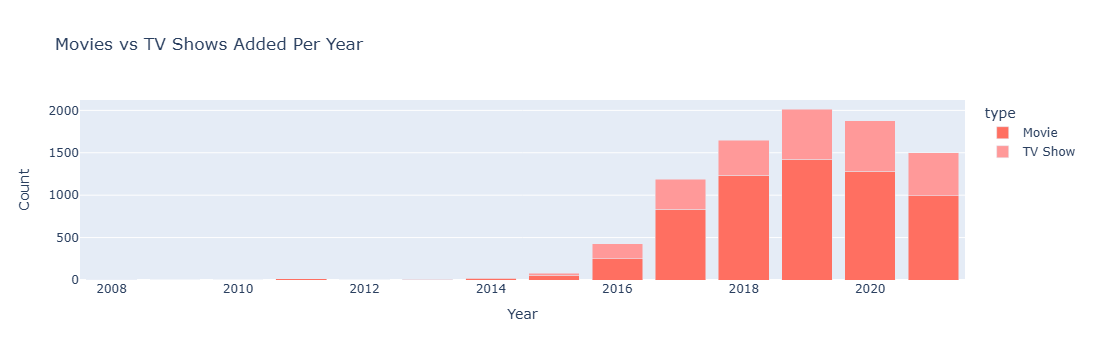

In [12]:
import plotly.express as px

# Movies vs TV Shows per year
content_per_year = data.groupby(['year_added', 'type']).size().reset_index(name='Count')

fig6 = px.bar(
    content_per_year,
    x='year_added',
    y='Count',
    color='type',
    barmode='stack',
    title="Movies vs TV Shows Added Per Year",
    color_discrete_sequence=[netflix_reds[0], netflix_reds[3]]
)

# Axis labels
fig6.update_layout(
    xaxis_title="Year",
    yaxis_title="Count"
)

# Disable hover tooltips
fig6.update_traces(
    hoverinfo="none",
    hovertemplate=None
)

fig6.show()


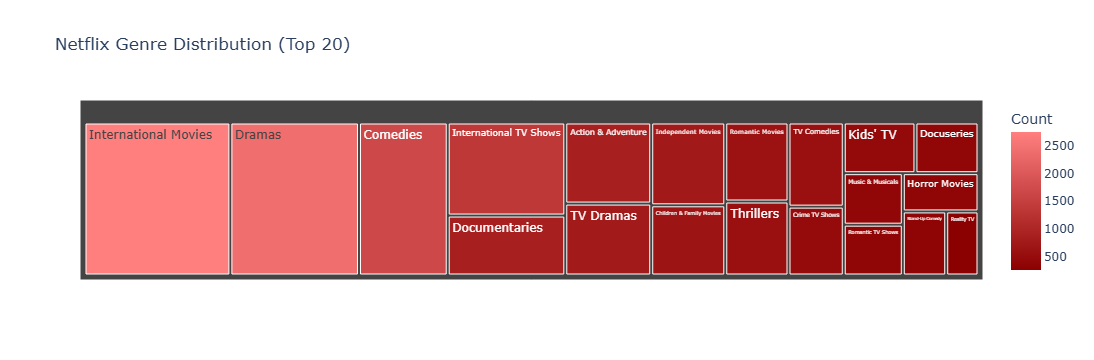

In [13]:
import plotly.express as px
import pandas as pd

# Split genres and count
all_genres = data['listed_in'].dropna().str.split(', ').sum()
genre_counts = pd.Series(all_genres).value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Treemap plot
fig7 = px.treemap(
    genre_counts.head(20),
    path=['Genre'],
    values='Count',
    title="Netflix Genre Distribution (Top 20)",
    color='Count',
    color_continuous_scale=['#8B0000', '#FF7F7F']   # same colors as your code
)

# Disable hover info
fig7.update_traces(
    hoverinfo="none",
    hovertemplate=None
)

fig7.show()

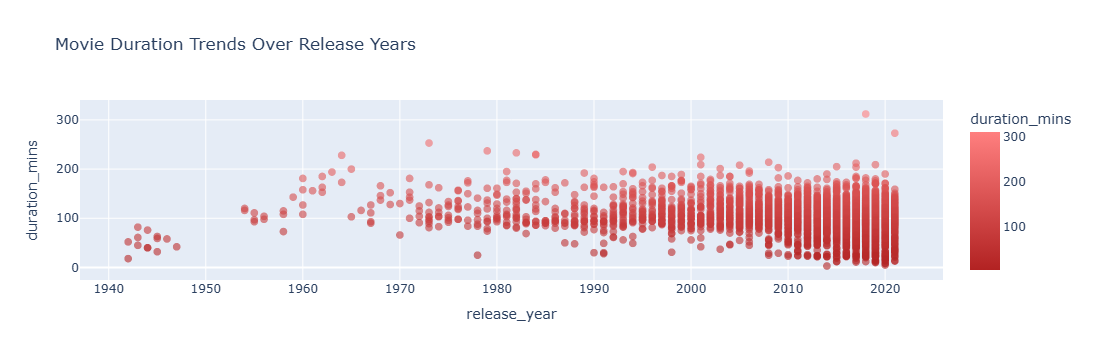

In [14]:
import plotly.express as px

# Filter only Movies with numeric duration
movies = data[data['type'] == 'Movie'].copy()
movies['duration_mins'] = movies['duration'].str.replace(' min','', regex=True)
movies = movies[movies['duration_mins'].str.isnumeric()]
movies['duration_mins'] = movies['duration_mins'].astype(int)

# Scatter plot
fig8 = px.scatter(
    movies,
    x='release_year',
    y='duration_mins',
    title="Movie Duration Trends Over Release Years",
    color='duration_mins',
    color_continuous_scale=['#B22222', '#FF7F7F']  # same colors as your code
)

# Marker style + disable hover
fig8.update_traces(
    marker=dict(size=8, opacity=0.6),
    hoverinfo="none",       #  disable hover info
    hovertemplate=None     #  Ensure no tooltip shows
)

fig8.show()


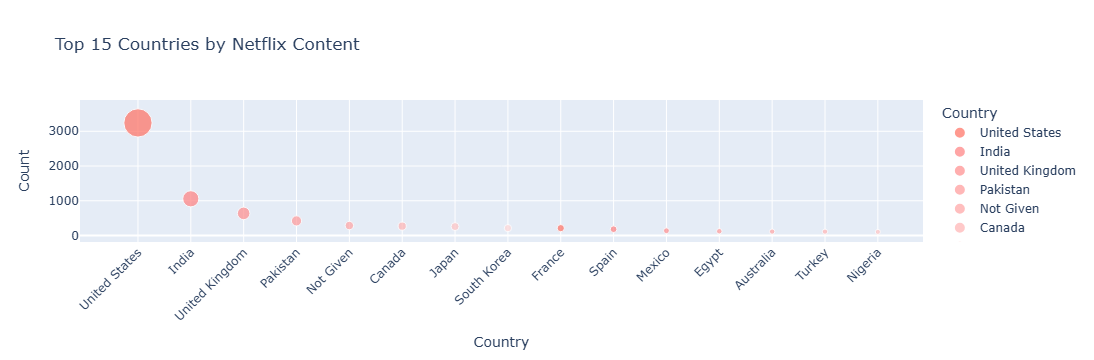

In [15]:
import plotly.express as px

# Top 15 countries
top_countries = data['country'].value_counts().reset_index().head(15)
top_countries.columns = ['Country', 'Count']

# Scatter bubble plot
fig9 = px.scatter(
    top_countries,
    x='Country',
    y='Count',
    size='Count',
    color='Country',
    title="Top 15 Countries by Netflix Content",
    color_discrete_sequence=netflix_reds
)

# Layout and disable hover
fig9.update_layout(
    xaxis_tickangle=-45
)
fig9.update_traces(
    hoverinfo="none",   #  Disable hover info
    hovertemplate=None  #  Ensure no tooltip shows
)

fig9.show()

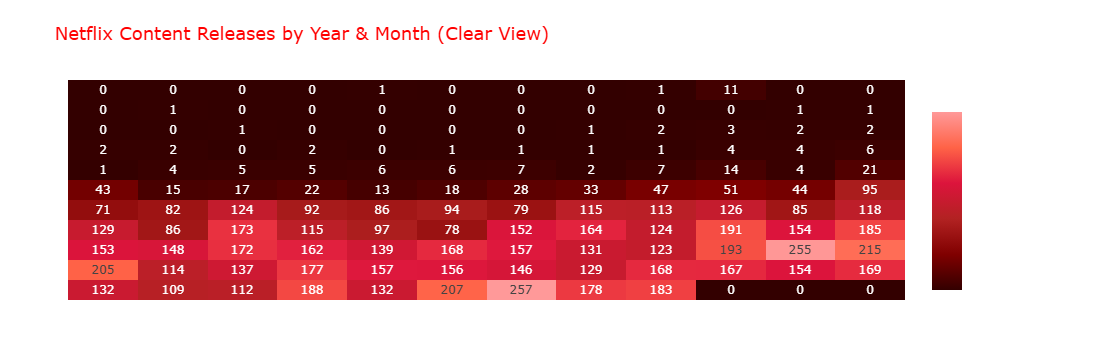

In [16]:
# Drop missing dates
data = data.dropna(subset=['date_added'])
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

# Group by Year & Month
heatmap_data = data.groupby(['year_added','month_added']).size().reset_index(name='Count')

# Month labels
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Create pivot table
heatmap_pivot = heatmap_data.pivot(index="year_added", columns="month_added", values="Count").fillna(0)

# Limit to recent years (optional: last 10 years for clarity)
heatmap_pivot = heatmap_pivot.loc[heatmap_pivot.index >= (heatmap_pivot.index.max() - 10)]

# Plot Heatmap
fig_heatmap = px.imshow(
    heatmap_pivot,
    labels=dict(x="Month", y="Year", color="Number of Releases"),
    x=month_labels,
    y=heatmap_pivot.index,
    text_auto=True,  # show values inside cells
    color_continuous_scale=["#330000", "#800000", "#B22222", "#DC143C", "#FF6347", "#FF9999"],
    title="Netflix Content Releases by Year & Month (Clear View)"
)
# Layout adjustments
fig_heatmap.update_layout(
    xaxis_title="Month",
    yaxis_title="Year",
    font=dict(size=12, color="white"),
    title_font=dict(size=18, color="red"),
    margin=dict(l=60, r=40, t=80, b=60)
)

fig_heatmap.show()